In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

2024-07-23 16:53:46.400613: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#download the weather images and put them in a directory
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine-Learning-for-ClimateWins/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [17]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/20


2024-07-23 17:37:57.389648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:57: Filling up shuffle buffer (this may take a while): 2 of 8
2024-07-23 17:38:11.655556: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:57: Filling up shuffle buffer (this may take a while): 4 of 8
2024-07-23 17:38:24.703597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:57: Filling up shuffle buffer (this may take a while): 6 of 8
2024-07-23 17:38:38.362487: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


75/75 ━━━━━━━━━━━━━━━━━━━━ 696s 9s/step - accuracy: 0.8497 - loss: 0.0539 - val_accuracy: 0.8657 - val_loss: 0.0554
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:29 2s/step - accuracy: 0.9167 - loss: 0.0601

2024-07-23 17:49:14.835845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9167 - loss: 0.0601 - val_accuracy: 0.7500 - val_loss: 0.0888
Epoch 3/20


2024-07-23 17:49:21.580442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8689 - loss: 0.0516 - val_accuracy: 0.8333 - val_loss: 0.0661
Epoch 4/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:08 929ms/step - accuracy: 0.8333 - loss: 0.0420

2024-07-23 17:51:41.245633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8333 - loss: 0.0420 - val_accuracy: 0.8750 - val_loss: 0.0709
Epoch 5/20


2024-07-23 17:51:41.520050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 116s 985ms/step - accuracy: 0.9058 - loss: 0.0395 - val_accuracy: 0.7731 - val_loss: 0.0981
Epoch 6/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 1.0000 - loss: 2.6266e-10

2024-07-23 17:53:37.512162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.6266e-10 - val_accuracy: 0.7500 - val_loss: 0.0700
Epoch 7/20


2024-07-23 17:53:37.777705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8754 - loss: 0.0497 - val_accuracy: 0.8102 - val_loss: 0.0775
Epoch 8/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 1.0000 - loss: 0.0021

2024-07-23 17:55:05.276109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.7500 - val_loss: 0.0798
Epoch 9/20


2024-07-23 17:55:05.530482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8959 - loss: 0.0416 - val_accuracy: 0.7500 - val_loss: 0.1038
Epoch 10/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 1:33 1s/step - accuracy: 0.9167 - loss: 0.0385

2024-07-23 17:56:41.557988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9167 - loss: 0.0385 - val_accuracy: 0.7500 - val_loss: 0.1296
Epoch 11/20


2024-07-23 17:56:41.912160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8009 - loss: 0.0719 - val_accuracy: 0.8056 - val_loss: 0.0845
Epoch 12/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:14 2s/step - accuracy: 0.7500 - loss: 0.0711

2024-07-23 17:59:14.155892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 0.0711 - val_accuracy: 0.8750 - val_loss: 0.0625
Epoch 13/20


2024-07-23 17:59:14.596533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8622 - loss: 0.0490 - val_accuracy: 0.7824 - val_loss: 0.0835
Epoch 14/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:03 2s/step - accuracy: 0.9167 - loss: 0.0470

2024-07-23 18:01:51.700546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9167 - loss: 0.0470 - val_accuracy: 0.7500 - val_loss: 0.1258
Epoch 15/20


2024-07-23 18:01:52.123657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9196 - loss: 0.0342 - val_accuracy: 0.8611 - val_loss: 0.0527
Epoch 16/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:13 2s/step - accuracy: 0.8333 - loss: 0.0622

2024-07-23 18:04:46.776974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8333 - loss: 0.0622 - val_accuracy: 0.8750 - val_loss: 0.0560
Epoch 17/20


2024-07-23 18:04:47.202905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9044 - loss: 0.0386 - val_accuracy: 0.7685 - val_loss: 0.0933
Epoch 18/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 3:14 3s/step - accuracy: 1.0000 - loss: 6.0617e-04

2024-07-23 18:07:27.548532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 6.0617e-04 - val_accuracy: 0.8750 - val_loss: 0.0626
Epoch 19/20


2024-07-23 18:07:28.316979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9015 - loss: 0.0341 - val_accuracy: 0.7963 - val_loss: 0.0868
Epoch 20/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:20 2s/step - accuracy: 1.0000 - loss: 2.8127e-04

2024-07-23 18:10:14.300533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 2.8127e-04 - val_accuracy: 1.0000 - val_loss: 2.3843e-06


2024-07-23 18:10:14.676782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [18]:
results = pd.DataFrame(model.history.history)

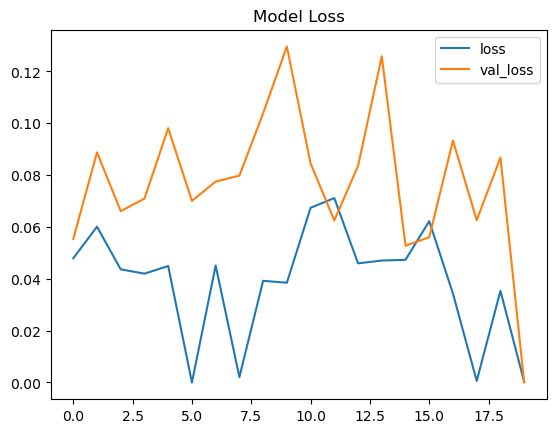

In [19]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

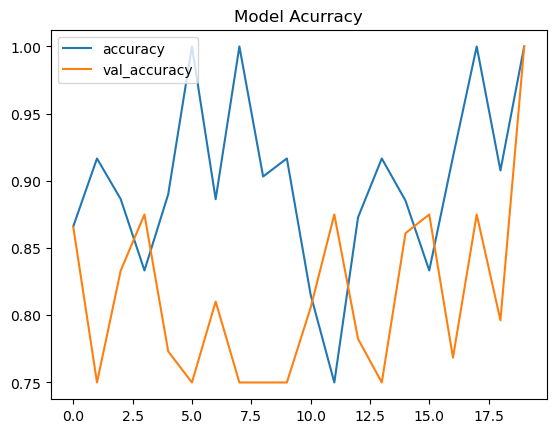

In [20]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [21]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 1.0, Val_Accuracy: 1.0
Loss: 0.0002812741731759161, Val_Loss: 2.384323806836619e-06


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 878ms/step


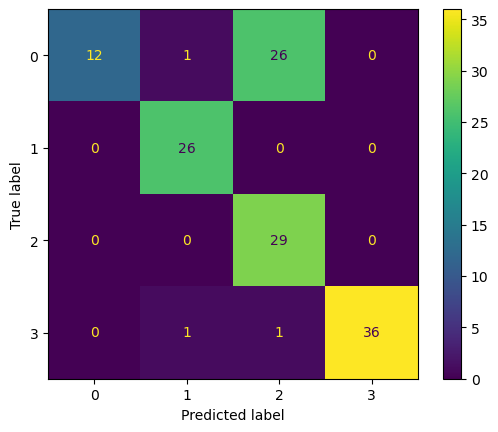

In [22]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


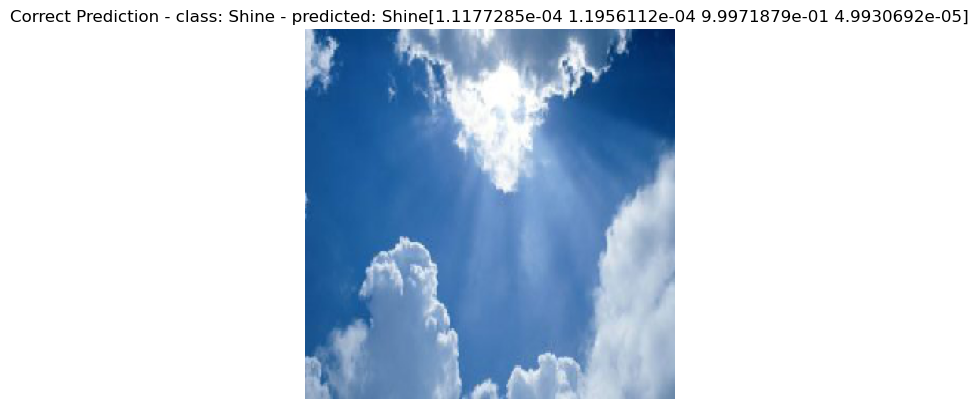

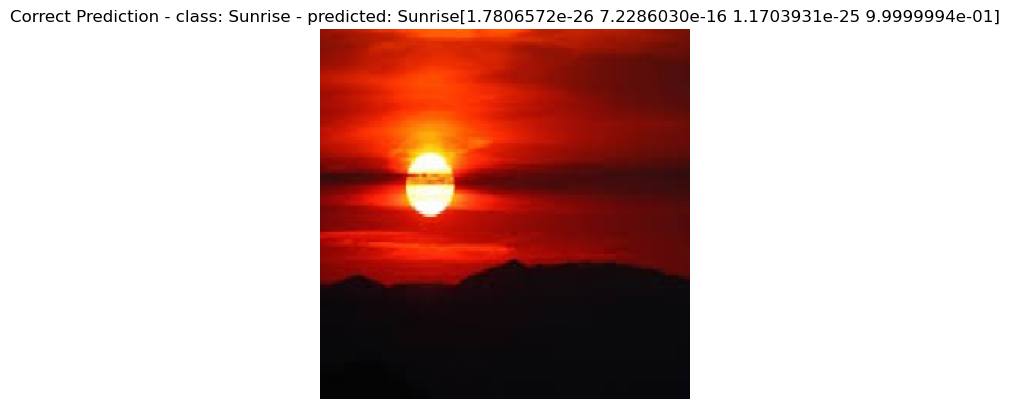

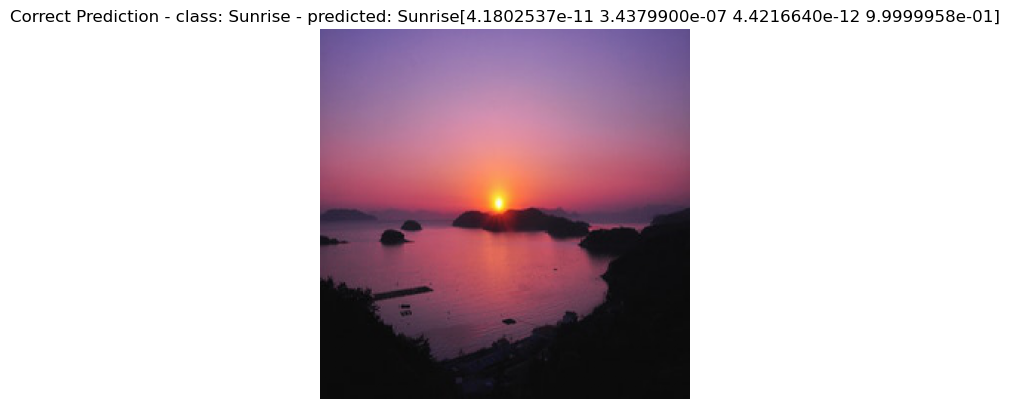

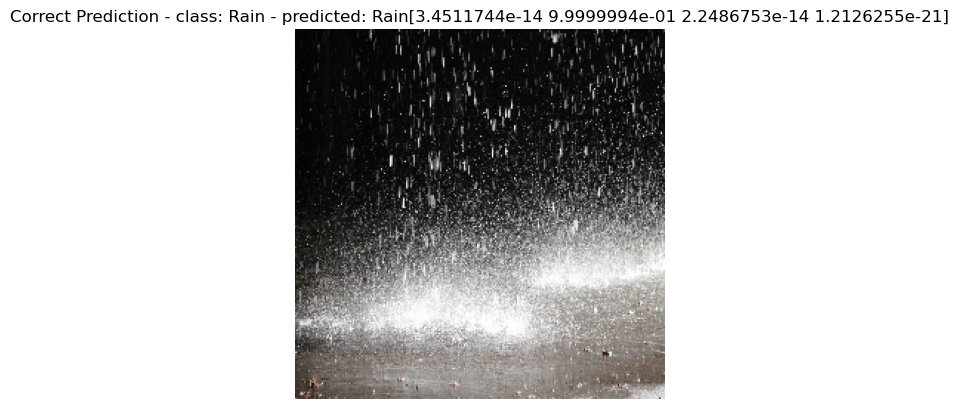

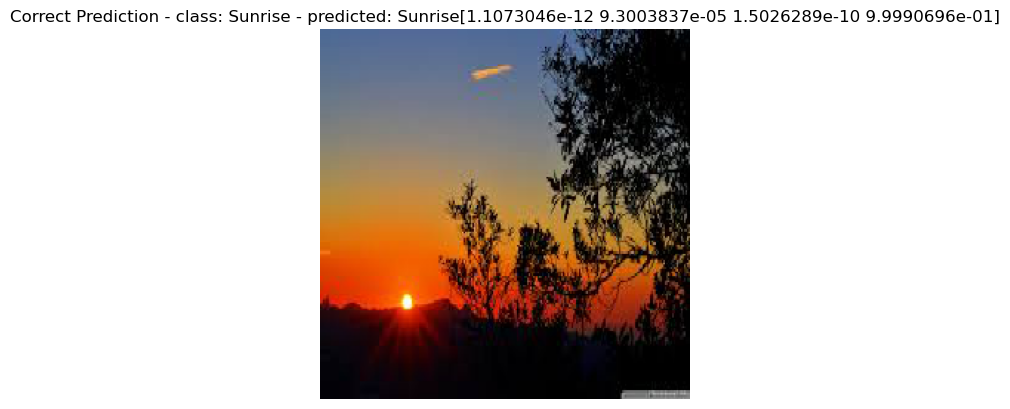

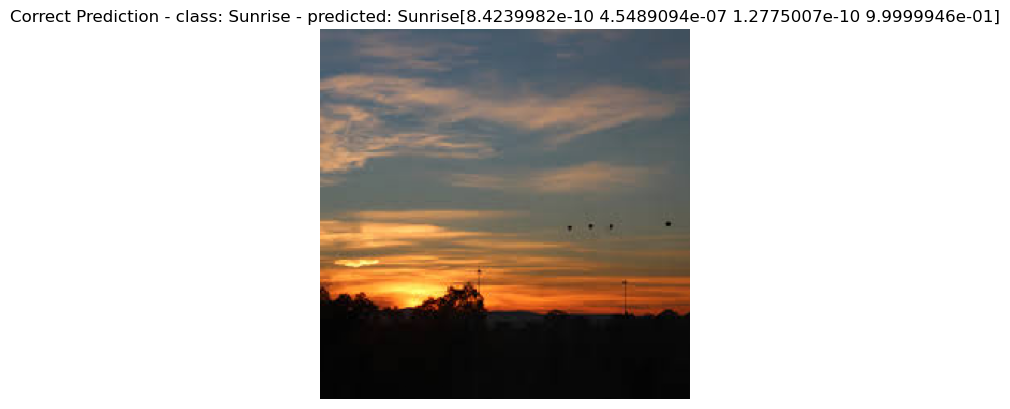

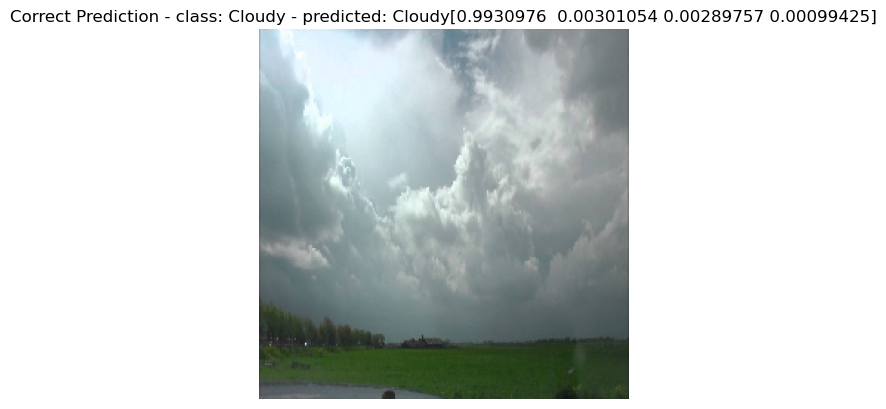

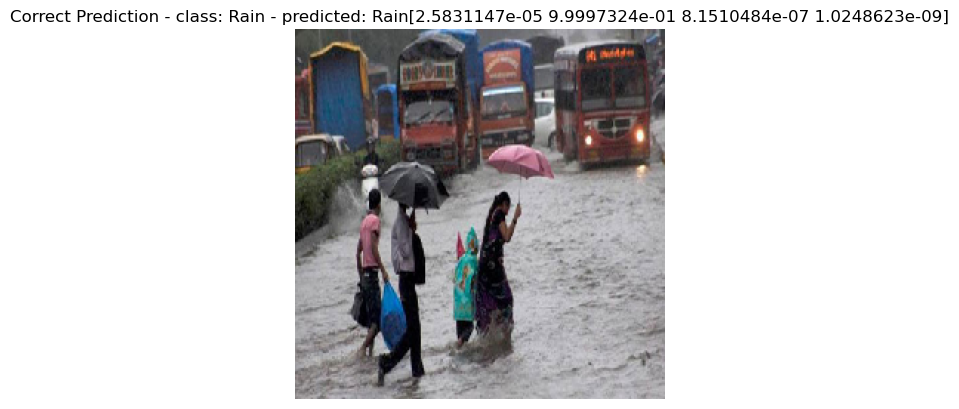

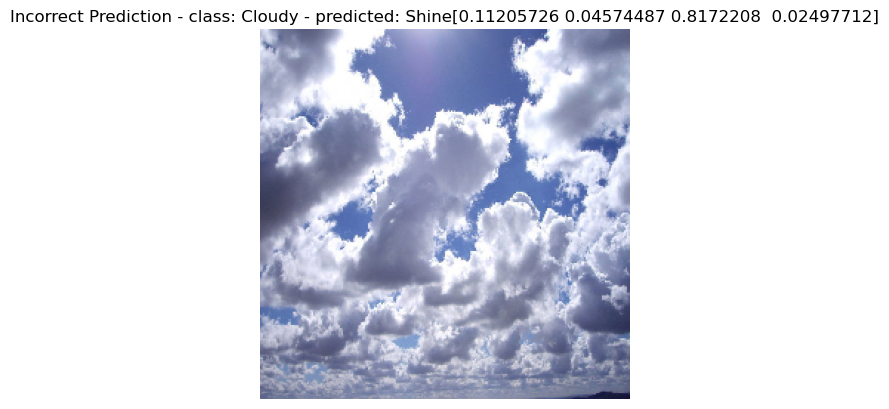

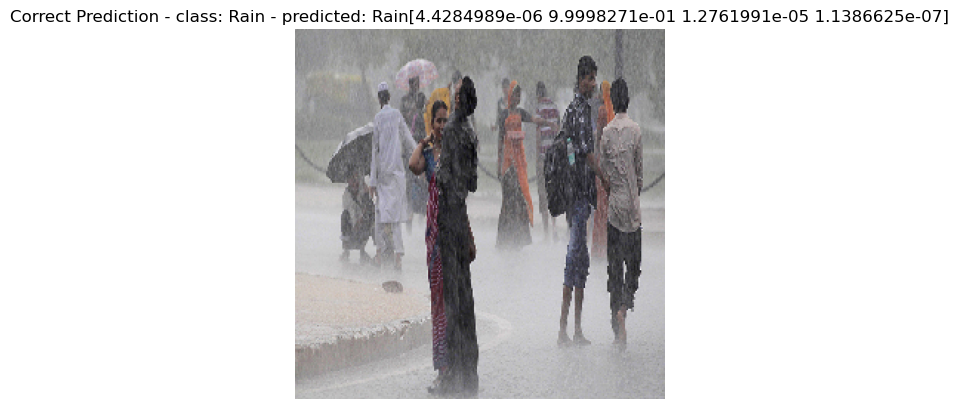

In [24]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.